# Objectives
1. Introduction to HTML 
  - HyperText Markup language
  - Attributes
  - Xpath
2. Xpath and Selector
  - Xpathology
  - Selector object
3. CSS lacator
4. Spider
5. Reference: class and instance
6. Bonus: format method
***Spider is not yet finshied*** 

## 1. Introduction to HTML

### 1.1 HyperText Markup Language
<html> ... </html>: html content 
<body> ... </body>: body of html
<div> ... </div>: defining the section of a body
<p> ... </p>: paragraph in the body

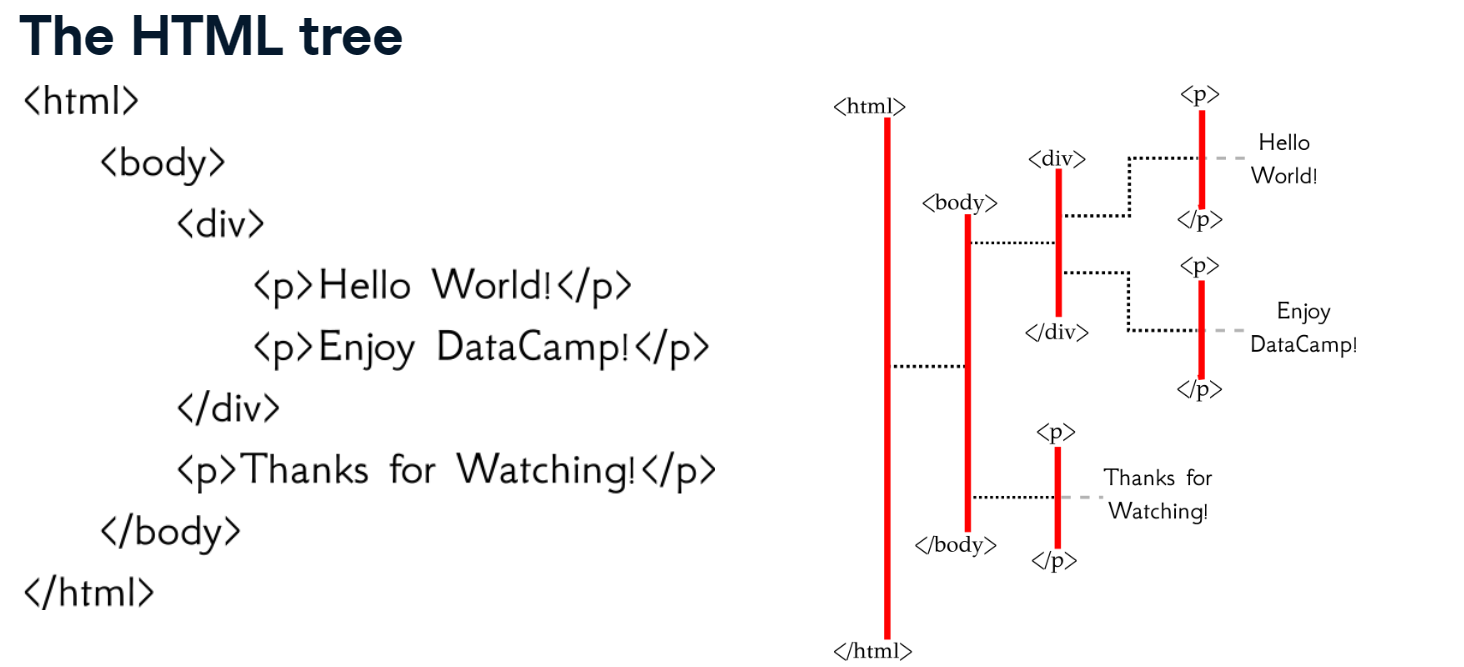

### 1.2 Attributes
<tag-name attrib-name = 'attrib info'>
    ...element contents..
</tag-name>

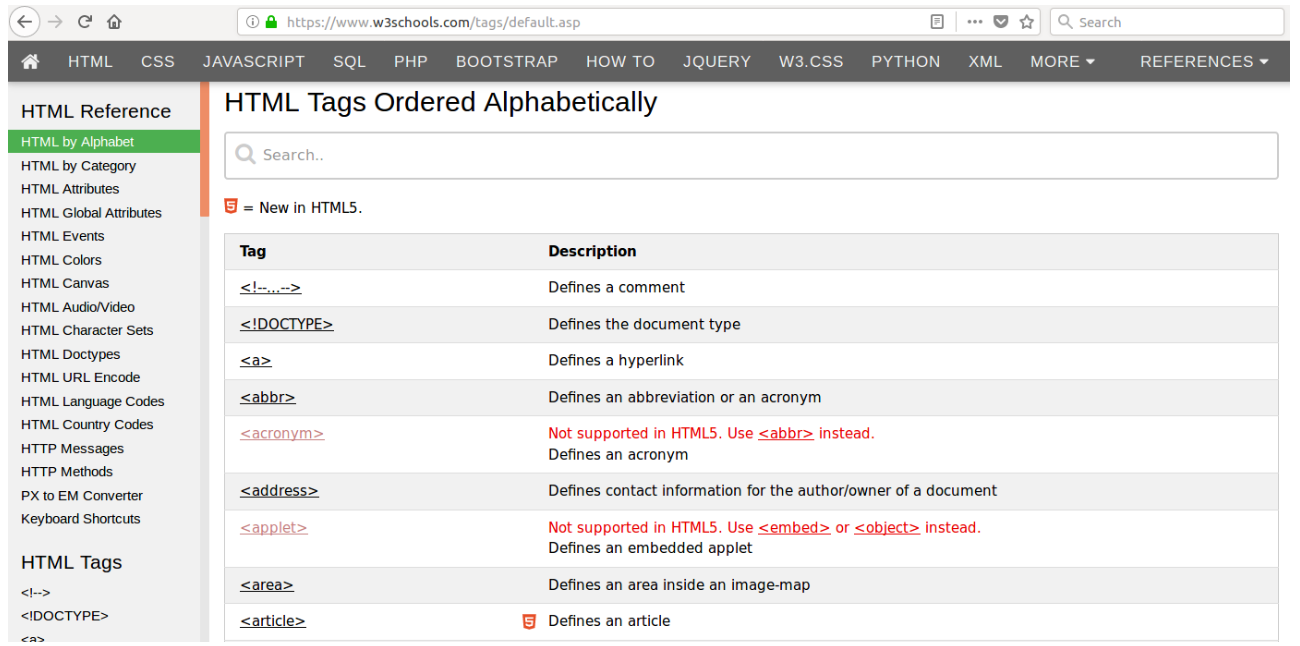

### 1.3 Crash Course in XPath
- xpath = '/html/body/div[2]'
- xpath = '//table' - direct to all 'table' elements in the HTML
- xpath = '/html/body/div[2]//table'

In [1]:
# select all span elements whose class attribute equals "span-class"
xpath = '//span[@class="span-class"]'

## 2. XPath and Selector

## 2.1 Xpathology

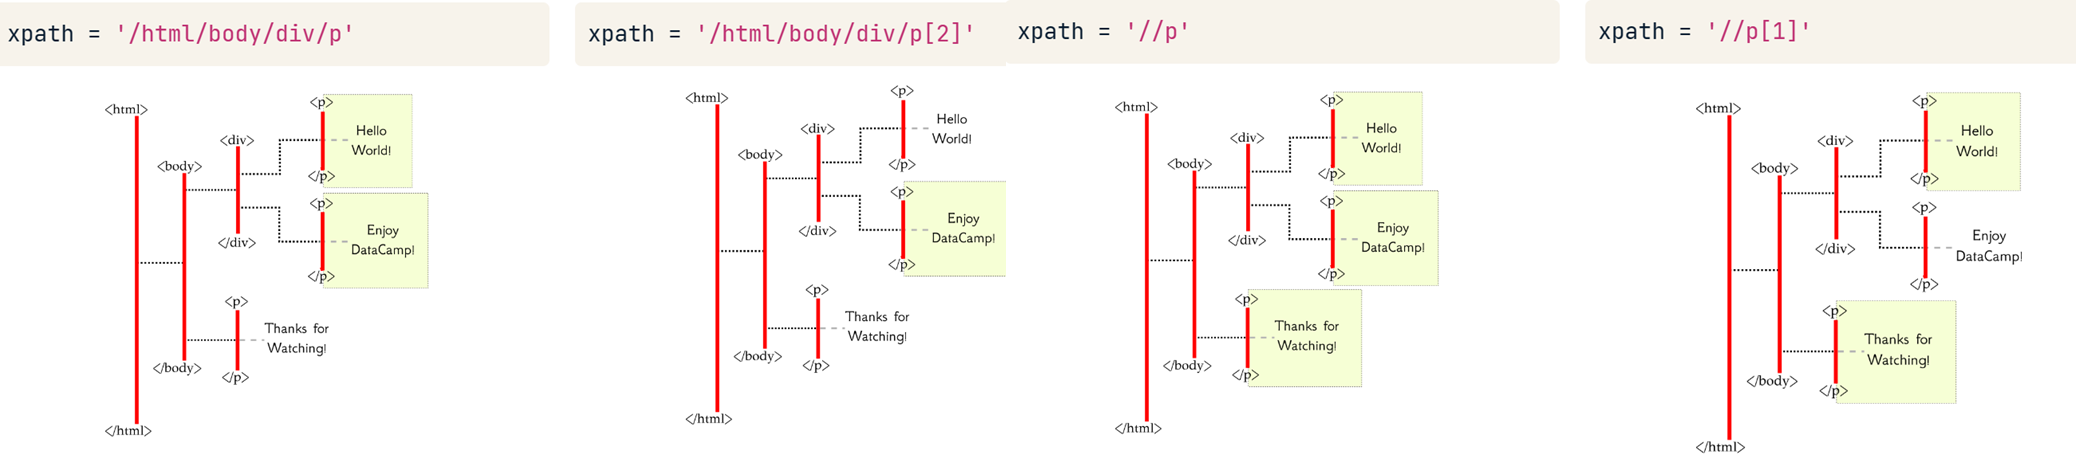

**The Wildcard x: igore the type**

In [2]:
xpath = '/html/body/*'
# all elements one generation below the body element without concern of the tag type
# it selects all children of the body element.

In [ ]:
xpath = '/html/body//*'
# selects all elements from all future generations of the body element (that is, all descendants of the body) regardless of tag type

**Off the Beaten XPath**
- @ represents "attribute"
- Xpath contains Notation function: contains(@attri-name, "string-expr")

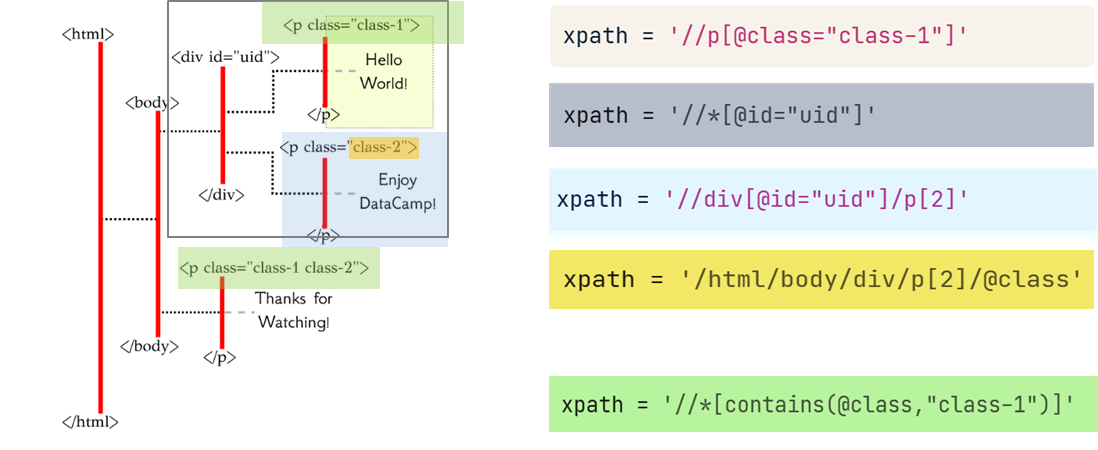

In [ ]:
# Create an xpath to the href attributes
xpath = '//a[contains(@class,"package-snippet")]/@href'
# directs to all "href" attribut values of teh hyperlink "a" elements whoc class attributes contain the sting

# Print out how many elements are selected
how_many_elements( xpath )
# Preview the selected elements
preview( xpath )
#The function preview() allows you to pass in an XPath string
# it will print out the first few elements you've selected

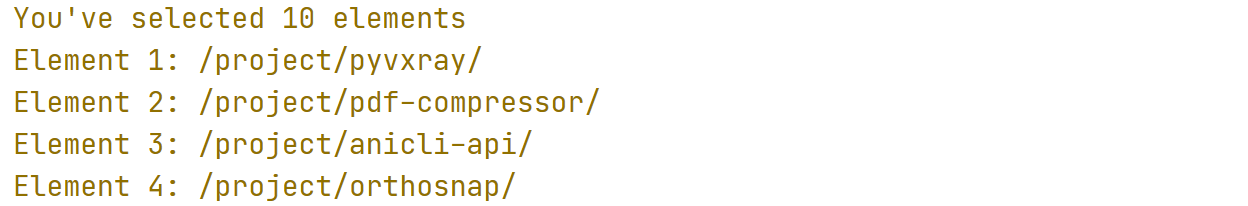

### 2.2 Selector objects
- .Selector(text = html)
- .extract()
- .extract_first()

In [4]:
from scrapy import Selector

In [11]:
html = '''<html>
  <body>
    <div id="div1" class="class-1">
      <p class="class-1 class-2">Hello World!</p>
      <div id="div2">
        <p id="p2" class="class-2">Choose DataCamp!</p>
      </div>
    </div>
    <div id="div3" class="class-2">
      <p class="class-2">Thanks for Watching!</p>
    </div>
  </body>
</html>'''

In [12]:
# Create a Selector object
sel = Selector(text = html)
sel

<Selector xpath=None data='<html>\n  <body>\n    <div id="div1" cl...'>

In [24]:
sel.xpath("//p")
# use xpath call within a Selector to create new Selector of specific piecepf the html code
# the return is a SelectorList of Selector objects

[<Selector xpath='.//p' data='<p class="class-1 class-2">Hello Worl...'>,
 <Selector xpath='.//p' data='<p id="p2" class="class-2">Choose Dat...'>,
 <Selector xpath='.//p' data='<p class="class-2">Thanks for Watchin...'>]

In [26]:
# Extracting Data from a Selector using extract method
sel.xpath("//p").extract()

['<p class="class-1 class-2">Hello World!</p>\n      <div id="div2">\n        <p id="p2" class="class-2">Choose DataCamp!</p>\n      </div>\n    </div>\n    <div id="div3" class="class-2">\n      <p class="class-2">Thanks for Watching!</p>\n    </div>\n  </body>\n</html>\n',
 '<p id="p2" class="class-2">Choose DataCamp!</p>\n      </div>\n    </div>\n    <div id="div3" class="class-2">\n      <p class="class-2">Thanks for Watching!</p>\n    </div>\n  </body>\n</html>\n',
 '<p class="class-2">Thanks for Watching!</p>\n    </div>\n  </body>\n</html>\n']

In [19]:
# Extracting first Data from a Selector using extract method
sel.xpath("//p[1]").extract_first()

'<p class="class-1 class-2">Hello World!</p>\n      <div id="div2">\n        <p id="p2" class="class-2">Choose DataCamp!</p>\n      </div>\n    </div>\n    <div id="div3" class="class-2">\n      <p class="class-2">Thanks for Watching!</p>\n    </div>\n  </body>\n</html>\n'

In [30]:
ps = sel.xpath("//p")

# index from 0, silcing the list
second_p = ps[1]
second_p.extract()

'<p id="p2" class="class-2">Choose DataCamp!</p>\n      </div>\n    </div>\n    <div id="div3" class="class-2">\n      <p class="class-2">Thanks for Watching!</p>\n    </div>\n  </body>\n</html>\n'

In [35]:
# The code len( divs[0].xpath('./*') ) gives the total number of children of the first div element in the HTML code.
div = sel.xpath("//div")
len(div[0].xpath('./*') )

2

**XPath Chaining** *(below two are same)*
- xpath('/html/body/div[2]')
- sel.xpath('/html').xpath('./body').xpath('./div[2]')

### 2.4 The Source of the Source
- Viewing the "Source" = HTML Code
- Inspecting elements
- Get HTML text into a Selector Object: request library 

In [3]:
from scrapy import Selector
import requests
url = "https://www.primusline.com.cn"
html = requests.get(url).content
html

b'<!DOCTYPE html>\n<html dir="ltr" lang="zh-CN">\n<head>\n\n<meta charset="utf-8">\n<!-- \n\tDesign, Entwicklung und Implementierung - https://www.medienreaktor.de/\n\n\tThis website is powered by TYPO3 - inspiring people to share!\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\n\tTYPO3 is copyright 1998-2023 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\n\tInformation and contribution at https://typo3.org/\n-->\n\n\n\n<title>\xe7\xae\xa1\xe9\x81\x93\xe7\xbb\xb4\xe4\xbf\xae|\xe5\xbe\xb7\xe5\x9b\xbd\xe6\x99\xae\xe8\x8e\xb1\xe5\xa7\x86\xe6\x96\xaf\xe5\x85\xac\xe5\x8f\xb8: Primus Line</title>\n<meta http-equiv="x-ua-compatible" content="IE=edge,chrome=1" />\n<meta name="generator" content="TYPO3 CMS" />\n<meta name="description" content="\xe9\x9d\x9e\xe5\xbc\x80\xe6\x8c\x96\xe7\xae\xa1\xe9\x81\x93\xe4\xbf\xae\xe5\xa4\x8d|\xe5\xbe\xb7\xe5\x9b\xbd\xe6\x99\xae\xe8\x8e\xb1\xe5\xa7\x86\xe6\

In [7]:
sel = Selector(text = html)

In [10]:
href = sel.xpath("//a/@href")
href

[<Selector xpath='//a/@href' data='https://www.werner-raedlinger-gruppe.de'>,
 <Selector xpath='//a/@href' data='https://www.werner-raedlinger-gruppe....'>,
 <Selector xpath='//a/@href' data='/'>,
 <Selector xpath='//a/@href' data='/product'>,
 <Selector xpath='//a/@href' data='/product'>,
 <Selector xpath='//a/@href' data='/product/liner'>,
 <Selector xpath='//a/@href' data='/product/liner/w-liner'>,
 <Selector xpath='//a/@href' data='/product/liner/g-liner'>,
 <Selector xpath='//a/@href' data='/product/liner/o-liner'>,
 <Selector xpath='//a/@href' data='/product/liner/f-liner'>,
 <Selector xpath='//a/@href' data='/product/connector'>,
 <Selector xpath='//a/@href' data='/product/connector/m-connector'>,
 <Selector xpath='//a/@href' data='/product/connector/r-connector'>,
 <Selector xpath='//a/@href' data='/product/connector/q-connector'>,
 <Selector xpath='//a/@href' data='/product/features'>,
 <Selector xpath='//a/@href' data='/product/features/bend-flexibility'>,
 <Selector xpath='/

## 3. CSS Locators, Chaining, and Responses
- CSS
- response.url

### 3.1 From XPath to CSS
- Cascading Style Sheets(CSS): describes how the elements are displayed on the screen 

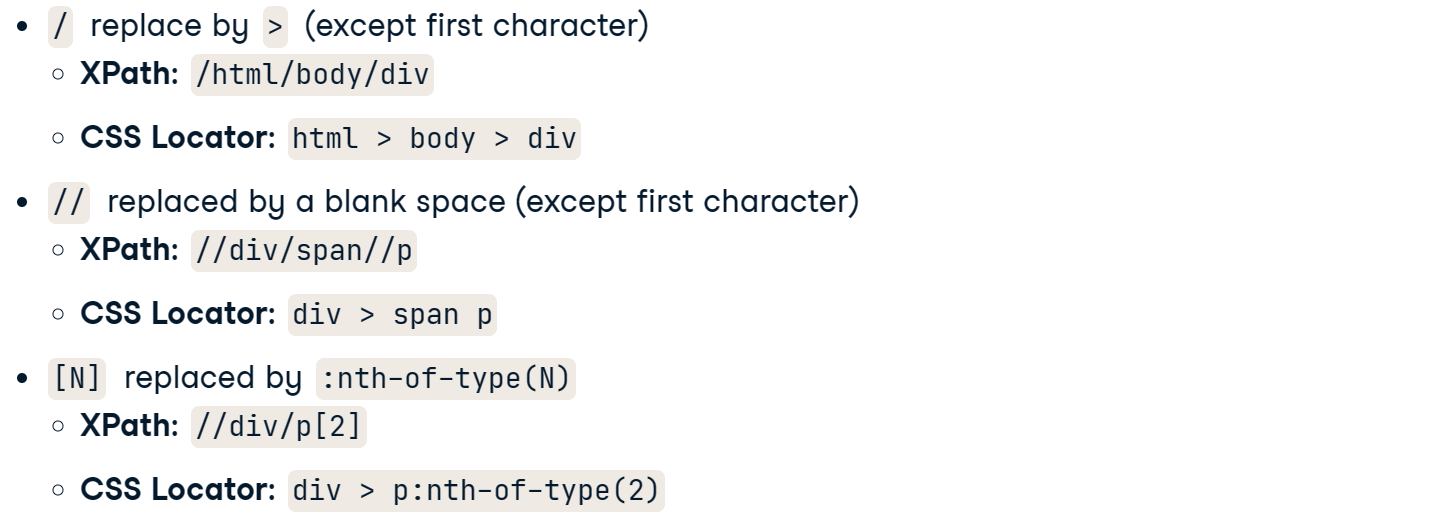

In [ ]:
# XPath
xpath = '/html/body//div/p[2]'
# CSS
css = 'html > body div > p:nth-of-type(2)'

In [ ]:
# to find an element by class, use "."
p.class-1 
# select all paragraph element belonging to class-1

# to find an element by id, use a pound sigh "#"
div#uid
# select the div element wiht id equal to uid

css_lacator = 'div#uid > p.class1'
css_lacator = '.class1'
# select all elements whose class attribute belongs to class1 
xpath = '//*[@class = "class1"]'  # excact match 
xpath = '//*[contains(@class = "class1")]' # all match

### 3.2 CSS attributes and text selection

- **Using XPath: <xpath-to-element>/@attr-name**
<br>
  - xpath = '//div[@id = "uid"]/a/@href'*
<br>   
- **Using CSS locator: <css-to-element>::attr(attr-name)**
<br>
 - css_locator = 'div#uid > a::attr(href)'

In [14]:
html = '''<p id = "p-example">
Hello World!
Try <a href = "http://www.datacamp.com"</a>today!
/p>'''

**Use XPath**

In [19]:
sel = Selector(text = html)
xp = sel.xpath('//a/@href').extract()
print(xp)

xp_t = sel.xpath('//p[@id = "p-example"]/text()').extract()
# extract all the text within this element but not future generations
print(xp_t)

xp_tt = sel.xpath('//p[@id = "p-example"]//text()').extract()
# extract all the text within this element, also in future generations
print(xp_tt)

['http://www.datacamp.com']
['\nHello World!\nTry ']
['\nHello World!\nTry ', 'today!\n/p>']


**Use CSS**

In [25]:
sel = Selector(text = html)
cs = sel.css(' a::attr(href)').extract()
print(cs)

cs_t = sel.css(' p#p-example::text').extract()
# extract all the text within this element but not future generations
print(cs_t)

# add space before ::
cs_tt = sel.css('p#p-example ::text').extract()
# extract all the text within this element, also in future generations
print(cs_tt)

['http://www.datacamp.com']
['\nHello World!\nTry ']
['\nHello World!\nTry ', 'today!\n/p>']


### 3.3 response.url
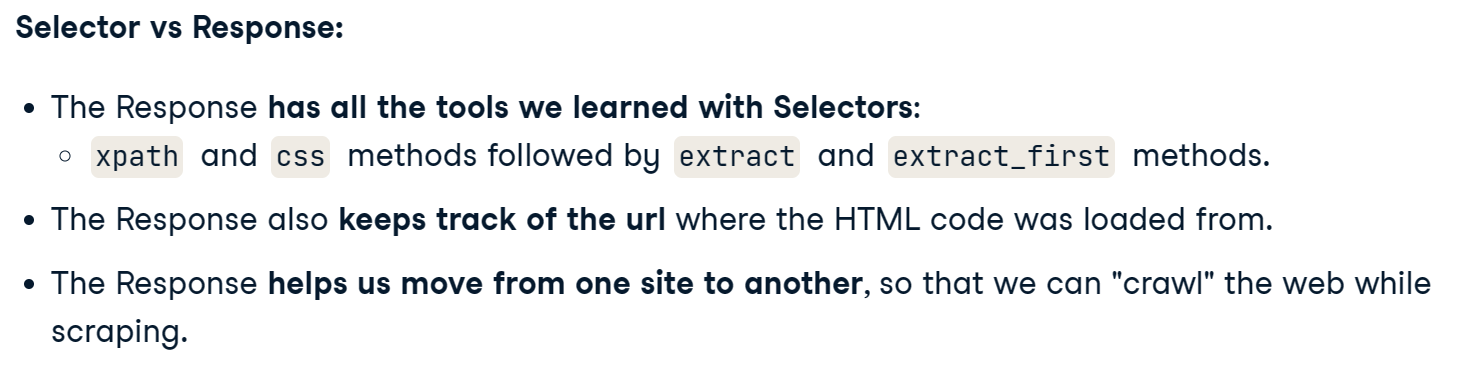

*How to build response object will use scrapy.Request --> This will be explained on Chapter 4 Spider*

In [ ]:
# Select all desired div elements
divs = response.css( 'div.course-block' )

# Take the first div element
first_div = divs[0]

# Extract the text from the h4 element in first_div
h4_text = first_div.css('h4::text').extract_first()

# Print out the text
print( "The text from the h4 element is:", h4_text )

The text from the h4 element is: Introduction to R

## 4. Spider
https://www.datacamp.com/courses/all
- Required import 
- The actual spider
- Running the spider

**Required import**

In [21]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [ ]:
# Create the spider class
# The input (attribute) of the class must be 'scarpy.Spider'
class YourSpider(scrapy.Spider):
  name = "your_spider"

**Start requests**

In [ ]:
# start requests on single page
# scrapy.request will fill in a response variable for us
# callback argument tells where to send the resonse variable for processing

def start_rquessts(self):
    url = "https://www.datacamp.com","https://scrapy.org"
    yield scrapy.Request(url, callback = self.parse)   

In [ ]:
# requires multiple web pages
def start_requests(self):
    urls = ["https://www.datacamp.com","https://scrapy.org"]
    for url in urls: 
        yield scrapy.Request(url, callback = self.parse)

*We only need to adjust the URL adress and pay attention to which method we want to use to parse passing to callback*

In [ ]:
# Import scrapy library
import scrapy

# Create the spider class
class YourSpider(scrapy.Spider):
    name = "your_spider"
    # start_requests method
    
    def start_requests( self ):
        self.print_msg( 'Hello World!' )
    # parse method
    
    def parse( self, response ):
        pass
    # print_msg method
    
    def print_msg( self, msg ):
        print( "Calling start_requests in YourSpider prints out:", msg )

In [ ]:
# Import scrapy library
import scrapy

# Create the spider class
class YourSpider( scrapy.Spider ):
    name = "your_spider"
    
    # start_requests method
    def start_requests( self ):
        yield scrapy.Request(url = "https://www.datacamp.com", callback = self.parse )
    
    # parse method
    def parse( self, response ):
        pass

**Parse and Crawl**

In [ ]:
def parse(self, response):
    # input parsing code with response you have required
    # output to a file, or ...
    # crawl the web! 

In [ ]:
# send the filled in response to the 'parse'
def parse(self, response):
    # simple example: write out the html
    html_file = 'DC-courses.html'
    with open(html_file, 'wb') as fout: 
        fout.write(response.body)

*Create a list*

In [ ]:
# extract the course links from the course
def parse(self, response):
    # return a list
    links = response.css('div.course-block > a::attr(href)').extract()
    # save those links to a file
    filepath = 'DC_links.csv'
    with open(filepath, 'w') as f: 
        f.writelines([link + '/n' for link in links])

In [ ]:
# start_requests method
def start_requests( self ):
    yield scrapy.Request( url = url_short, callback = self.parse )
    
# parse method
def parse( self, response):
    # Create an extracted list of course author names
    author_names = response.css('p.course-block__author-name::text').extract()
    # Here we will just return the list of Authors
    return author_names


*Parse the 2rd page*

In [ ]:
# spider crawls between different sites
def parse(self,response):
    links = response.css('div.course-block > a::attr(href)').extract()
    # let spider follow the links 
    for link in links: 
        # 'follow' method similar to scrapy.Request call 
        yield response.follow( url = link, callback = self.parse2 )

# create the 2rd parser 
def parse2(self, response):
    # parse the course sites

In [ ]:
# Import the scrapy library
import scrapy

# Create the Spider class
class DCdescr( scrapy.Spider ):
    name = 'dcdescr'
    
    # start_requests method
    def start_requests( self ):
        yield scrapy.Request( url = url_short, callback = self.parse )
  
    # First parse method
    def parse( self, response ):
        links = response.css( 'div.course-block > a::attr(href)' ).extract()
        # Follow each of the extracted links
        for link in links:
            yield response.follow(url = link, callback = self.parse_descr)
      
    # Second parsing method
    def parse_descr( self, response):
        # Extract course description
        course_descr = response.css( 'p.course__description::text' ).extract_first()
        # For now, just yield the course description
        yield course_descr

In [ ]:
# Create a list of all the links on the front page 
def parse_front(self, response):
    # narrow in on the course blocks
    course_blocks = response.css('div.course-block')
    # direct to the course links
    course_link = course_block.xpath('./a/@href')
    # extract the links (as a list of strings)
    links_to_follow = course_link.extract()
    # follow the links to the next parser
    for link in links_to_follow:
        yield response.follow(url = link, callback = self.parse_pages)
        
def parse_pages(self, response):
    # direct to the course title text
    crs_title = response.xpath('//h1[contains(@class,"title")]/text()')
    # extract and clean the course title 
    crs_title_ext = crs_title.extract_first().strip()
    # direct to the chapter title text
    ch_titles = response.css('h4.chapter__title::text')
    # to get many chapter titles under one course
    ch_titles_ext = [t.strip() for t in ch_titles.extract()]
    # store this into a dictionary 
    dc_dict [crs_title_ext] = ch_titles_ext

*Last step*

In [ ]:
# empty dictionary ready to fill in the content from the spider 
dc_dict = dict()

process = CrawlerProcess()
process.crawl(your_spider)
process.start()

**Your Spiders**

In [1]:
# import packages
import scrapy
from scrapy.crawler import CrawlerProcess
import sys

# Create class
class dc_chapter_spider(scrapy.Spider):
    name = 'dc-chapter_spider'
    
    # start scrapy.Request method to create Response object
    def start_requests(self):
        URL = 'https://assets.datacamp.com/production/repositories/2560/datasets/19a0a26daa8d9db1d920b5d5607c19d6d8094b3b/all_short'
        # here create a Response object
        yield scrapy.Request(url = URL, callback = self.parse_front)
        
    # start parse the front page
    def parse_front(self,response):
        cs_titles_links = response.css('div.course-block > a::attr(href)').extract()
        for link in cs_titles_links:
            yield scrapy.follow(url = link, callback = self.parse_pages)
            
    # parses the sub-titles 
    def parse_pages(self, response):
        crs_titles = response.xpath('//h1[contains(@class,"title")]/text()')
        crs_titles_ext = ch.titles.extract().strip()
        ch_titles = respone.css('h4.chapter__title::text')
        ch_titles_ext = [t.strip() for t in ch_titles.extract()]
        dc_dict[crs_titles_ext] = ch_titles_ext
        
# Initialize the dictionary **outside** of the Spider class
dc_dict = dict()

# Run the Spider
process = CrawlerProcess()
process.crawl(dc_chapter_spider)
process.start()


print(dc_dict)

2023-01-18 10:33:47 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2023-01-18 10:33:47 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1n  15 Mar 2022), cryptography 3.4.8, Platform Windows-10-10.0.19044-SP0
2023-01-18 10:33:47 [scrapy.crawler] INFO: Overridden settings:
{}
2023-01-18 10:33:47 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2023-01-18 10:33:47 [scrapy.extensions.telnet] INFO: Telnet Password: 6e4ba15a3fe4092c
2023-01-18 10:33:47 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2023-01-18 10:33:48 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scr

{}


In [1]:
# Import scrapy
import scrapy

# Import the CrawlerProcess: for running the spider
from scrapy.crawler import CrawlerProcess

# Create the Spider class
class DC_Description_Spider(scrapy.Spider):
    name = "dc_chapter_spider"
  # start_requests method
    def start_requests(self):
        url_short = 'https://assets.datacamp.com/production/repositories/2560/datasets/19a0a26daa8d9db1d920b5d5607c19d6d8094b3b/all_short'
        yield scrapy.Request(url = url_short,
                         callback = self.parse_front)
  # First parsing method
    def parse_front(self, response):
        course_blocks = response.css('div.course-block')
        course_links = course_blocks.xpath('./a/@href')
        links_to_follow = course_links.extract()
        for url in links_to_follow:
            yield response.follow(url = url,
                            callback = self.parse_pages)
            
  # Second parsing method
    def parse_pages(self, response):
        # Create a SelectorList of the course titles text
        crs_title = response.xpath('//h1[contains(@class,"title")]/text()')
        # Extract the text and strip it clean
        crs_title_ext = crs_title.extract_first().strip()
        # Create a SelectorList of course descriptions text
        crs_descr = response.css('p.course__description::text')
        # Extract the text and strip it clean
        crs_descr_ext = crs_descr.extract_first().strip()
       # Fill in the dictionary
        dc_dict[crs_title_ext] = crs_descr_ext

# Initialize the dictionary **outside** of the Spider class
dc_dict = dict()

# Run the Spider
process = CrawlerProcess()
process.crawl(DC_Description_Spider)
process.start()

# Print a preview of courses
print(dc_dict)

2023-01-18 11:04:31 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2023-01-18 11:04:31 [scrapy.utils.log] INFO: Versions: lxml 4.8.0.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1n  15 Mar 2022), cryptography 3.4.8, Platform Windows-10-10.0.19044-SP0
2023-01-18 11:04:31 [scrapy.crawler] INFO: Overridden settings:
{}
2023-01-18 11:04:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2023-01-18 11:04:31 [scrapy.extensions.telnet] INFO: Telnet Password: 2ef9ded4c9af8e16
2023-01-18 11:04:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2023-01-18 11:04:31 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scr

{}


In [ ]:
# Import scrapy
import scrapy

# Import the CrawlerProcess
from scrapy.crawler import CrawlerProcess

# Create the Spider class
class YourSpider(scrapy.Spider):
    name = 'yourspider'
    # start_requests method
    def start_requests( self ):
        url_short = 'https://assets.datacamp.com/production/repositories/2560/datasets/19a0a26daa8d9db1d920b5d5607c19d6d8094b3b/all_short'
        yield scrapy.Request(url = url_short, callback = self.parse)
      
    def parse(self, response):
        crs_titles = response.xpath('//h4[contains(@class,"block__title")]/text()').extract()
        crs_descrs = response.xpath('//p[contains(@class,"block__description")]/text()').extract()
        for crs_title, crs_descr in zip( crs_titles, crs_descrs ):
          dc_dict[crs_title] = crs_descr
    
# Initialize the dictionary **outside** of the Spider class
dc_dict = dict()

# Run the Spider
process = CrawlerProcess()
process.crawl(YourSpider)
process.start()

# Print a preview of courses
previewCourses(dc_dict)

## 5. Reference: About Class

### 1. Why use class?
- Allow us logically group our data (attributes) and functions (methods) in a way that's easy to reuse and also build upon if need be 

### 2. Example
- An application for our company: we want to represent our employees and python code. Each employee has specific attributes and methods, such as name, E-mail address, pay and also actions to perform and so on. 
- If we have a class, we can use it as a blueprint to create each employee (instance) so that we do not need to do this manually each time from scratch 
- When one of the attributes of the class changes, all the instances' attributes change at the same time

In [103]:
# skip the function for now 
# Noted: each employee is an unique instance of the class 
class Employee:
    pass
emp_1 = Employee()
emp_2 = Employee()

print(emp_1)
print(emp_2)

emp_1.first = 'Corey'
emp_1.last = 'Schafer'
emp_1.email = 'Corey.Schafer@gmail.com'
emp_1.pay = 5000 

emp_2.first = 'Simon'
emp_2.last = 'Gross'
emp_2.email = 'Simon.Gross@gmail.com'
emp_2.pay = 7000 

print(emp_1.email)
print(emp_2.email)

Corey.Schafer@gmail.com
Simon.Gross@gmail.com


In [7]:
class Employee: 
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'

# emp_1 or emp_2 are the 'self', the others are the attributes of this instance 
emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000)

print(emp_1.email)
print(emp_2.email)
print('{} {}'.format(emp_1.first, emp_1.last))

Corey.Schafer@gmail.com
Simon.Gross@gmail.com
Corey Schafer


In [16]:
# To build some actions which are called methods
class Employee: 
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
    
    # Create a method called full name - do not forget 'self' argument 
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
  
    
emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000)  

# print out the method when without ()
print(emp_2.fullname)
# print out the return value 
# def fullname() without 'self' will automatically pass emp_2 to the argument
print(emp_2.fullname())
# print out class.method(instance)
print(Employee.fullname(emp_2))

<bound method Employee.fullname of <__main__.Employee object at 0x0000025884B36130>>
Simon Gross
Simon Gross


### 3. Class methods vs. instance methods
**Instance methods**
- they pass instance "self" automatically as argument

In [29]:
# change the attribute of the class
class Employee: 
    
    # Creare a new class variable
    num_of_emps = 0
    
    # declare a class variable
    raise_amount = 1.05
    
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
        
        # each time create 1 employee, the number of employees increases by 1
        Employee.num_of_emps += 1
        # Only use class variable cos no case of only increasing one instacnce 
    
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    # modify one attribute to the all instances
    # all the employees get salary raised
    # instance methods
    def apply_raise(self):
        # raise_amount to class scope 
        # self.raise_amount - instance scope but instance has not this attribute
        self.pay = int(self.pay * self.raise_amount)
    
emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000) 

# check the attributes of the insance 'emp_1': no raise_amount attribute, so it refers to class scope
print(emp_1.__dict__)
# check the attributes of class: has raise_amount attribut
print(Employee.__dict__)

# this will change the value of raise_amount of the whole class
Employee.raise_amount = 1.08
# this will change the value of instance 'emp_1'
emp_1.raise_amount = 1.15

# check the attributes of the insance 'emp_1': has raise_amount attribute now!!!
print(emp_1.__dict__)

print(emp_1.pay)
emp_1.apply_raise()
print(emp_1.pay)

print(emp_1.raise_amount)
print(Employee.raise_amount)
print(emp_2.raise_amount)

print(Employee.num_of_emps)

{'first': 'Corey', 'last': 'Schafer', 'pay': 5000, 'email': 'Corey.Schafer@gmail.com'}
{'__module__': '__main__', 'num_of_emps': 2, 'raise_amount': 1.05, '__init__': <function Employee.__init__ at 0x00000258866CD1F0>, 'fullname': <function Employee.fullname at 0x00000258866CD9D0>, 'apply_raise': <function Employee.apply_raise at 0x00000258866CDD30>, '__dict__': <attribute '__dict__' of 'Employee' objects>, '__weakref__': <attribute '__weakref__' of 'Employee' objects>, '__doc__': None}
{'first': 'Corey', 'last': 'Schafer', 'pay': 5000, 'email': 'Corey.Schafer@gmail.com', 'raise_amount': 1.15}
5000
5750
1.15
1.08
1.08
2


**Class methods**
- They pass class automatically as the arguments

In [38]:
# class method: use class argument as priority 
class Employee: 
    
    num_of_emps = 0
    raise_amt = 1.05
    
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
        
        Employee.num_of_emps += 1
  
    # regular method automatically takes in the instance as the first argument 
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)
        
    # class method: takes class method as the first argument automatically
    # class method decorator 
    @classmethod 
    def set_raise_amt(cls, amount):
        cls.raise_amt = amount 
    
emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000)

print(Employee.raise_amt)
print(emp_1.raise_amt)
print(emp_2.raise_amt)

# recall the class method direcltly
Employee.set_raise_amt(1.02)

# run class methods on the instance
emp_1.set_raise_amt(1.02)

print(Employee.raise_amt)
print(emp_1.raise_amt)
print(emp_2.raise_amt)

# run class methods on the instance
emp_1.set_raise_amt(1.02)
# meaningless, still change the whole class variables

print(Employee.raise_amt)
print(emp_1.raise_amt)
print(emp_2.raise_amt)

1.05
1.05
1.05
1.02
1.02
1.02
1.02
1.02
1.02


**Class methods - alternative constructor**

In [45]:
# Use class methods as alternative constructors
# to provide multiple ways of creating our objects
# For example, convert fullname with strings to input values 

class Employee: 
    
    num_of_emps = 0
    raise_amt = 1.05
    
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
        
        Employee.num_of_emps += 1
  
    # regular method automatically takes in the instance as the first argument 
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)
        
    # class method: takes class method as the first argument automatically
    # class method decorator 
    @classmethod 
    def set_raise_amt(cls, amount):
        cls.raise_amt = amount 
     
    # create the constructor to split strings
    @classmethod
    def from_string(cls, emp_str):
        first, last, pay = emp_str.split('-') 
        return cls(first, last, pay)
    
emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000)

# Orginal data
emp_str_1 = 'John-Doe-7000'
emp_str_2 = 'Steve-Smith-6500'
emp_str_3 = 'Jane-Doe-9000'

"""# split name on hype: emp_str_1.split('-')
first, last, pay = emp_str_1.split('-') 

# create new employee
new_emp_1 = Employee(first, last, pay)"""

# call the from_string class method
new_emp_2 = Employee.from_string(emp_str_2)

print(new_emp_2.fullname())
print(new_emp_2.email)
print(new_emp_2.pay)

Steve Smith
Steve.Smith@gmail.com
6500


**Static methods**
- They do not pass anything automatically as arguments

In [49]:
class Employee: 
    
    num_of_emps = 0
    raise_amt = 1.05
    
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
        
        Employee.num_of_emps += 1
  
    # regular method automatically takes in the instance as the first argument 
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)
        
    # class method: takes class method as the first argument automatically
    # class method decorator 
    @classmethod 
    def set_raise_amt(cls, amount):
        cls.raise_amt = amount 
     
    # create the constructor to split strings
    @classmethod
    def from_string(cls, emp_str):
        first, last, pay = emp_str.split('-') 
        return cls(first, last, pay)

    # a function take in a date and return if workday or not 
    # it relates to the class but does not relate to any instance 
    # a decorator
    @staticmethod  
    def is_workday(day):
        if day.weekday() == 5 or day.weekday() == 6:
            return False
        return True

emp_1 = Employee('Corey', 'Schafer', 5000)
emp_2 = Employee('Simon', 'Gross', 7000)

# import date module 
import datetime
his_date = datetime.date(2023, 6, 14)
my_date = datetime.date(2023, 11, 27)

print(Employee.is_workday(his_date))
print(Employee.is_workday(my_date))

True
True


### 4. Inheritane - Subclass
- Create different sub-types or sub-categories

In [99]:
# Create different type of employees

class Employee: 
    
    raise_amt = 1.05
    
    # initialize or the constructor, call the instance "self"
    def __init__(self, first, last, pay):
        self.first = first 
        self.last = last
        self.pay = pay 
        self.email = first + '.' + last + '@gmail.com'
        
  
    # regular method automatically takes in the instance as the first argument 
    def fullname(self):
        return '{} {}'.format(self.first, self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amt)

# create a subclass 'Developer', inherented all the attributes and methods from 'Employee' class
# method resolution (chain): Developer - Employee - buildtins.object
"""class Developer(Employee):
    # apply 10% increase on Developer type
    raise_amt = 1.10"""

# add new attribution to the Developer group
class Developer(Employee):
    raise_amt = 1.10
    
    def __init__(self , first, last, pay, prog_lang):
        # use super().__init__ pass certain attributes to Employee class method
        super().__init__(first, last, pay)
        """Employee.__init__(self, first, last, pay)"""
        self.prog_lang = prog_lang

class Manager(Employee):
    raise_amt = 1.10
    
    # never set a mutable object as an argument 
    def __init__(self, first, last, pay, employees = None):
        super().__init__(first, last, pay)
        # set employees to an empty list if the argument is not provided
        if employees is None:
            self.employees = []
        # set employess equal to Employee if it has employees argument
        else: 
            self.employees = employees
            
    def add_emp(self, emp):
        if emp not in self.employees:
            self.employees.append(emp)
    
    def remove_emp(self, emp):
        if emp in self.employees:
            self.employees.remove(emp)
            
    def print_emps(self):
        for emp in self.employees:
            print('-->', emp.fullname())
            
dev_1 = Developer('Corey', 'Schafer', 5000, 'Python')
emp_1 = Employee('Simon', 'Gross', 7000)
mgr_1 = Manager('Linda', 'Qian', 12000, [dev_1])

# tells if an object is an instance of a class
print(isinstance(mgr_1, Manager))
print(isinstance(mgr_1, Employee))
print(isinstance(mgr_1, Developer))

# tells if an object is a subclass of a class
print(issubclass(Developer, Manager))
print(issubclass(Manager, Employee))

print(mgr_1.email)
mgr_1.add_emp(emp_1)
mgr_1.remove_emp(emp_1)
mgr_1.print_emps()

print(emp_1.fullname())
print(emp_1.pay)
emp_1.apply_raise()
print(emp_1.pay)

print(dev_1.fullname())
print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)
print(dev_1.prog_lang)


True
True
False
False
True
Linda.Qian@gmail.com
--> Corey Schafer
Simon Gross
7000
7350
Corey Schafer
5000
5500
Python


**Bonus: .format method**
- The format() method formats the specified value(s) and insert them inside the string's placeholder.
- The placeholder is defined using curly brackets: {}

In [100]:
txt = "For only {price:.2f} dollars!"
print(txt.format(price = 49))

For only 49.00 dollars!


In [102]:
txt1 = "My name is {fname}, I'm {age}".format(fname = "John", age = 36)
txt2 = "My name is {0}, I'm {1}".format("John",36)
txt3 = "My name is {}, I'm {}".format("John",36)

print(txt1);print(txt2);print(txt3)

My name is John, I'm 36
My name is John, I'm 36
My name is John, I'm 36


**Format types**
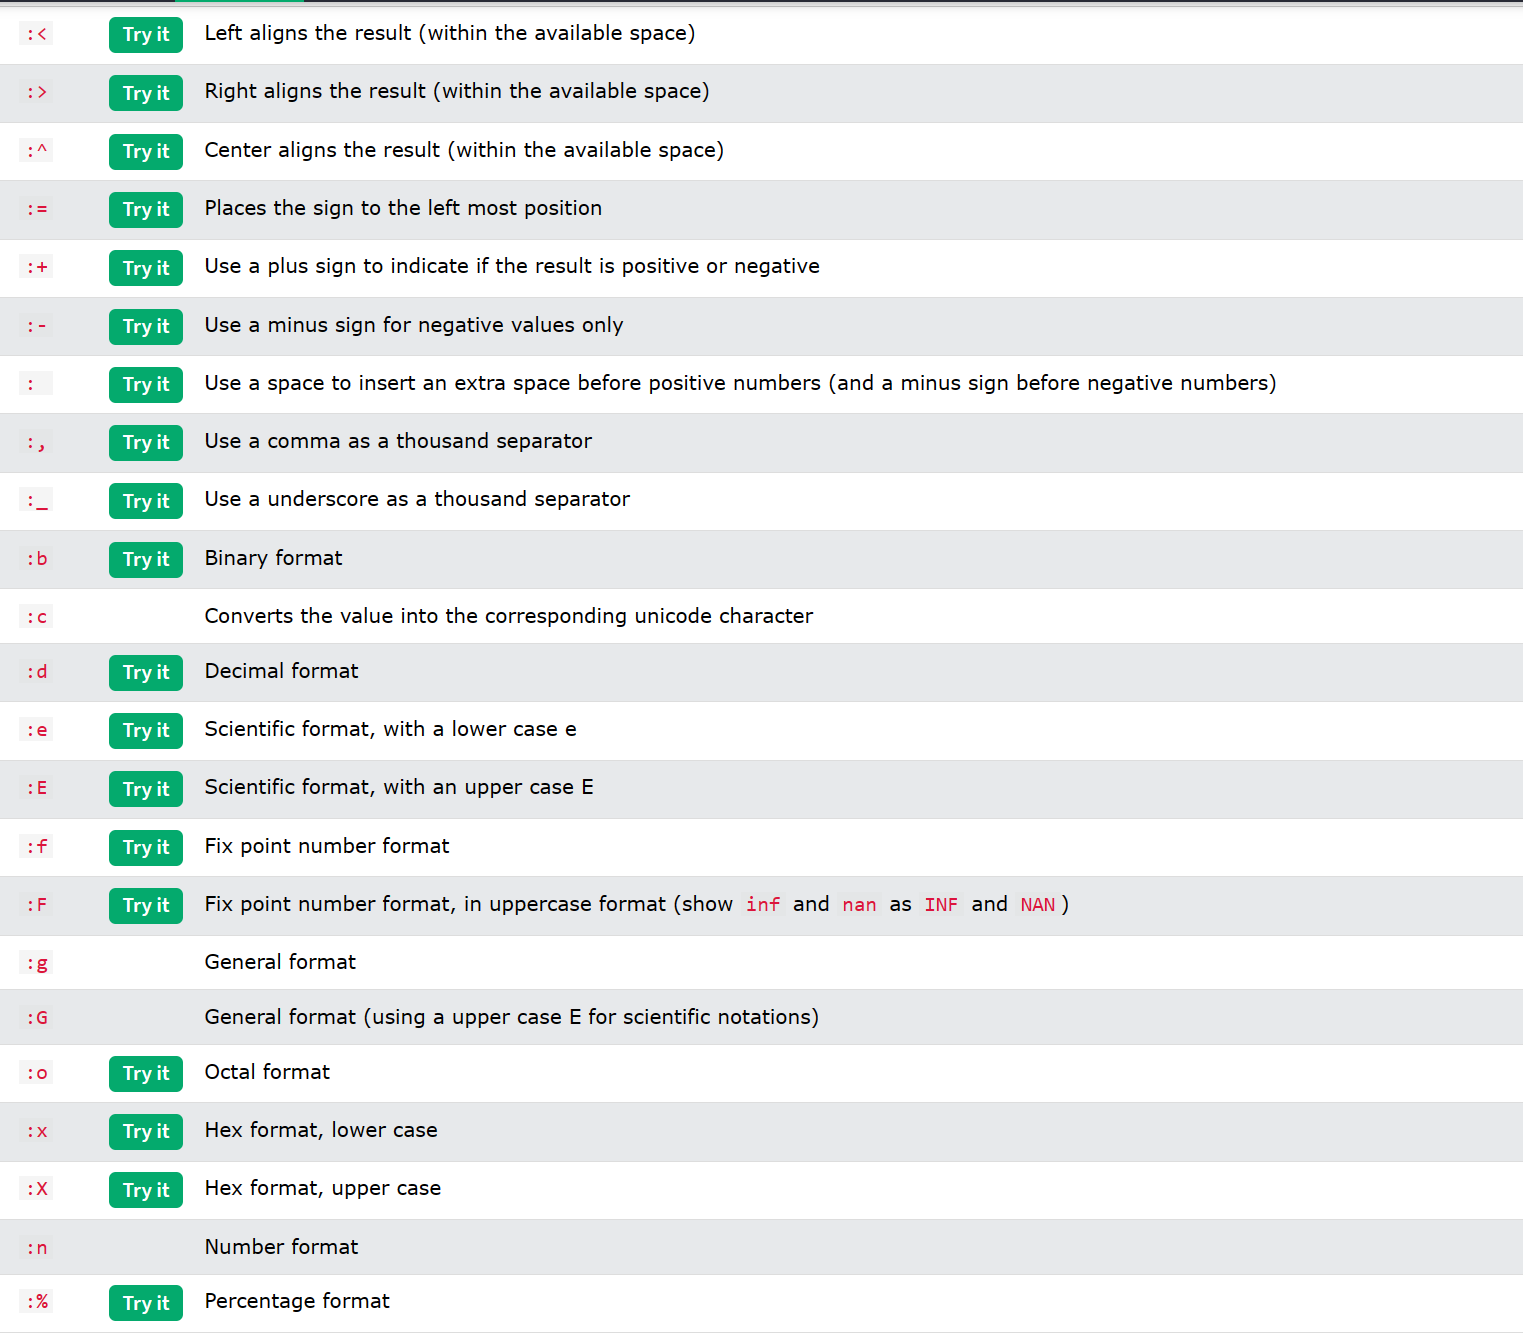

**draft area**

In [34]:
# import packages
import scrapy
from scrapy.crawler import CrawlerProcess
import sys

# Create class
class DC_Chapter_Spider(scrapy.Spider):
    name = 'dc-chapter_spider'
    
    # start scrapy.Request method to create Response object
    def start_requests(self):
        URL = 'https://docs.python.org/3/tutorial/index.html'
        # here create a Response object
        yield scrapy.Request(url = URL, callback = self.parse)
            
    # start parse the front page
    def parse(self,response):
        links = response.xpath('//li[contains(@class, "toctree-l1")]/a/@href').extract()
        # save those links to a file
        filepath = 'DC_links.csv'    
        filepath


In [36]:
from scrapy import Selector
import requests
import json

url = 'https://docs.python.org/3/tutorial/index.html'
response = requests.get(url)
html = response.content
      
sel = Selector(text = html)
items = sel.xpath('//li[contains(@class, "toctree-l1")]/a/@href').extract()
print(items)

2023-01-18 13:40:46 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): docs.python.org:443
2023-01-18 13:40:47 [urllib3.connectionpool] DEBUG: https://docs.python.org:443 "GET /3/tutorial/index.html HTTP/1.1" 200 6863


['appetite.html', 'interpreter.html', 'introduction.html', 'controlflow.html', 'datastructures.html', 'modules.html', 'inputoutput.html', 'errors.html', 'classes.html', 'stdlib.html', 'stdlib2.html', 'venv.html', 'whatnow.html', 'interactive.html', 'floatingpoint.html', 'appendix.html']
